> Федеральное государственное образовательное бюджетное учреждение высшего образования «Финансовый университет при Правительстве Российской Федерации»\
> Факультет информационных технологий и анализа больших данных\
> Кафедра прикладной математики и информатики
___

### Курсовая работа по курсу «Машинное обучение»

#### **Предварительный анализ данных и построение признаков в задачах обработки текстов на естественных языках.**

__Выполнил студент:__ Савченков Матвей Дмитриевич\
__Группа:__ ПМ22-1

#### **Введение**

> <div align="justify"> <b>Актуальность:</b>  С ростом количества текстовой информации различного вида: социальных сетей, онлайн-магазинов и новостных источников требуются способы подготовки данных, отличные от обработки обычных численных признаков. В таких случаях огромную актуальность имеют методы анализа блоков текста и машинного обучения, связанные с построением языковых моделей. В математической лингвистике широко применяются парадигмы NLP(Natural Language Processing). Такой подход позволяет решать задачи вроде обычного определения настроения текста или его основной мысли, что избавляет человека от изучения большого объёма словесной информации. Непосредственно NLP применяется в разрешении глобальных задач, таких как машинный перевод, который значительно облегчает и ускоряет процесс локализации литературы или упрощает коммуникацию между людьми, говорящими на разных языках. Помимо обработки и анализа, более сложные модели используются для генерации текстов, поиска информации и даже в разработке. Для воплощения всех этих идей в жизнь первым этапом служит анализ и предварительная обработка данных.</div>

> <div align="justify"> <b>Ключевыми объектами</b> исследования служат методы подготовки данных на естественном языке. Важно понимать, что разные задачи машинного обучения в сфере построения языковых моделей требуют использования своей методологии. В данной работе мы рассмотрим принципы предварительной обработке текстовых блоков информации, применимые в разных сферах машинного обучения, как в построении простых моделей, так и более сложных нейронных сетей.</div>

> <div align="justify"> <b>Предметом исследования</b> будут выступать способы трансформации текстовых данных в численный вид, разные виды анализа текста: морфологический, синтаксический и семантический.</div>

> <div align="justify"> <b> Среди задач обработки </b> текстовых сообщений лежит нормализация текстов. Этапами являются: токенизация и последующие виды преобразования слов: лемматизация или стемминг. Дальнейшая очистка токенов от шумов, вспомогательных частей речи вроде предлогов, союзов и т. д. Алгоритмы машинного обучения не способны напрямую обрабатывать тексты, предложения и слова. Для превращения строковых данных в цифровой формат применяются различные способы векторизации..</div>

> <div><b>Целью</b> исследований в данной сфере является нахождение оптимальных способов обработки текстов и визуализации информации под конкретные задачи. Для подготовки к использованию уже готовых сформированных признаков, подающихся на вход языковым моделям, и интерпретации результатов с помощью визуальных представлений.

## **Практика применения машинного обучения в обработке естественного языка**

In [ ]:
!git clone https://github.com/facebookresearch/fastText.git

In [ ]:
pip install fastText

In [ ]:
pip install pandas numpy nltk seaborn matplotlib scikit-learn wordcloud lime

In [1]:
# Библиотеки для работы с массивами данных и векторами
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Библиотеки для работы с текстом
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import fasttext.util
import string
import re

# Библиотеки для визуализации
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from wordcloud import WordCloud
from sklearn.manifold import TSNE
import lime.lime_text

# Библиотеки для работы с моделями
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Вспомогательные библиотеки
import copy
import warnings
from collections import Counter

warnings.filterwarnings('ignore')

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

##### **Загрузка данных и предварительный анализ**

Приработе с любыми данными первым шагом является загрузка данных и предворительныйй просмотр. Загрузим датасет с данными ```small_tweeter4.csv```. В файле содержится ```id``` пользовательского сообщения, само сообщение из twitter - ```content``` и класс сообщения по настроению - ```sentiment```.

In [3]:
data = pd.read_csv('small_tweeter4.csv', names=['content', 'sentiment'], skiprows=1, index_col=0)
data.head()

,content,sentiment
1310619,@seeunextweek :yeah..the &quot;hike&quot;thing...,4
942718,@twangly yeaa i found him now,4
198336,"sooo tired! i got donuts this morning, but not...",0
1032112,@lilladyv08 yes . he's hiqhly pissed but idc. ...,4
1267663,@gwalter re clean kids: call it a win.,4


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 72000 entries, 1310619 to 973963

Data columns (total 2 columns):

 #   Column     Non-Null Count  Dtype 

---  ------     --------------  ----- 

 0   content    72000 non-null  object

 1   sentiment  72000 non-null  int64 

dtypes: int64(1), object(1)

memory usage: 1.6+ MB


In [11]:
data.sentiment.unique()

array([4, 0])

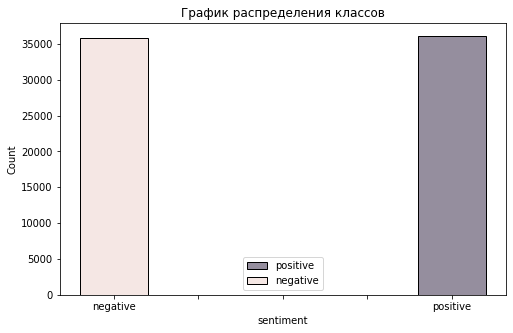

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='sentiment',
             discrete=True,
             shrink=.8,
             hue=data.sentiment)

plt.gca().set_xticklabels(['', 'negative', '', '', '', 'positive'])
plt.title('График распределения классов')
plt.legend(labels=['positive', 'negative'])
plt.show()

Посмотрим на сами данные: ```content``` строковые значения, ```sentiment``` может принимать два значения 0-negative и 4 - positive. Дисбаланса классов нет.

##### **Нормализация текста**

Дальше будем работать только со столбцом ```content```, приведём все слова к нижнему ригистру.

In [6]:
X = data.content.str.lower()
y = data.sentiment

<div align="justify">
Теперь напишем функцию для приведения сообщений к готовому виду для превращения их в числовые коды. Токенизируем текст - разделим его на слова. Среди слов удалим шумовые: twitter id, ссылки, знаки пунктуации, стоп-слова, проведём лемматизацию слов или стемминг.

><b>Токенизация текста </b> - это процесс разбиения большого текстововго блока на более мелкие, такие как предложения, слова. \
<b>Стоп-слова</b> - это слова создающие шумы. Таковыми являются вспомогательные части речи, такие как союзы, предлоги и т.д. Также удаляются часто используемые в речи слова. \
<b>Лемматизация</b> - это процесс приведения слова к его начальной форме - лемме. \
<b>Стемминг</b> - это процесс нахождения основы слова для заданного исходного. Более простой способ приведения слова к общей форме и обычно менее эффективный, чем лемматизация. Хотя и не всегда. 
<hr \>

</div>

<div align="justify">
Существует множество различных алгоритмов стемминга.

<b>Наиболее распространённые виды стемминга:</b>
> * <b>Porter Stemmer</b> - самый популярный стеммер. Такой метод умеренно укорачивает слова и сохраняет семантические свойства. Данный подход обрезает аффиксы, базируясь на уникальности правил морфологии каждого языка.
> * <b>Lovins Stemmer</b> - подход агрессивной обрезки слов, что делает их короче. При этом теряется больше семантических свойств. Скорость работы такого стеммера заметно выше за счёт того, что использует всего 2 шага для удаления аффикса, а не 8, как Porter Stemmer.
> * <b>Lancaster Stemmer</b> - это один из самых жёстких стеммеров. Ему свойственна чрезмерная обрезка слов. Также содержит в себе некоторые правила из-за которых морфемы отсекаются итеративно.

Библиотека Nltk предлагает разные виды токенизация. Например, классическое разбиение на слова Wordtokenize, разбиение на слова с краткими формами WordPunctTokenizer. Например, "that"s" будет разбито на "that", " " " и "s". Также Nltk предоставляет специализированные под конкретные задачи токенизаторы. В дальнейшей работе будем пользоваться одним из таких. Tweettokenizer - обработчик твитов, который будет учитывать особенности сообщений социальной сети.

In [4]:
def clean_text(X: pd.Series, analysis: str) -> pd.Series:
    lemmatizer = WordNetLemmatizer() # Для лемманизации
    stemmer = PorterStemmer() # Для стемминга
    punctuation = string.punctuation # Список знаков пунктуации
    tokenizer = TweetTokenizer() # Токинезатор
    stop_words = stopwords.words('english') # Список слов служебной части речи, часто встречающиеся слова
    id_pattern = r'@\S+' # Шаблон для удаления twitter id
    link_pattern = pattern = r'\b(?:https?|ftp):\/\/[-a-zA-Z0-9+&@#\/%?=~_|!:,.;]*[-a-zA-Z0-9+&@#\/%=~_|]' # шаблон для ссылок
    tokens = X.copy()

    # Обходим каждый твит и чистим его токены
    for i in range(len(tokens)):

        clear_tokens = re.sub(id_pattern, '', tokens.iloc[i]) # Уберём id людей
        clear_tokens = re.sub(link_pattern, '', clear_tokens) # Уберём ссылки
        clear_tokens = tokenizer.tokenize(clear_tokens) # Токенизируем сообщение
        clear_tokens = [re.split(r"[:,'!@#$%^&*();.]", token) for token in clear_tokens] # разбиавем слова слипшиеся со знаками препинанния: vacation/sightseeing
        clear_tokens = [token for sublist in clear_tokens for token in sublist if token != ''] # соединим всё в один список
        clear_tokens = [token for token in clear_tokens if len(token) > 1]
        if analysis == 'lem':
            clear_tokens = [lemmatizer.lemmatize(token) for token in clear_tokens] # Проведём лемманизацию
        if analysis == 'stem':
            clear_tokens = [stemmer.stem(token) for token in clear_tokens] # Проведём стемминг
        clear_tokens = [token for token in clear_tokens if token not in stop_words] # Удалим стоп слова
        tokens.iloc[i] = clear_tokens
    return tokens

Обработаем текст двумя способами, используя преобразования лемматизации и стемминга. Посмотрим, не появилось ли в датасете артефактов.

In [7]:
clean_tokens_lem = clean_text(X, analysis='lem')
clean_tokens_stem = clean_text(X, analysis='stem')

zero_tokens_lem = clean_tokens_lem[clean_tokens_lem.apply(len) == 0]
zero_tokens_stem = clean_tokens_stem[clean_tokens_stem.apply(len) == 0]

zero_tokens_lem.shape, zero_tokens_stem.shape

((354,), (333,))

<div align="justify">Внутри датасета появились пустые строки. Что это может значить? Вероятнее всего, это сообщения состояли только из Twitter Id, знаков препинания или стоп-слов. Так как таких строк немного, их можно просто удалить. Но если бы их оказалось больше, то это может значить, что собранные данные не очень качественные, потому что состоят из неидентифицируемых по настроению слов. Модель не сможет нормально обучиться. Результаты такой модели, вероятнее всего, будут неадекватные и неточные.</div>

In [8]:
clean_tokens_lem = clean_tokens_lem.drop(zero_tokens_lem.index)
y_lem = y.drop(zero_tokens_lem.index)

clean_tokens_stem = clean_tokens_stem.drop(zero_tokens_stem.index)
y_stem = y.drop(zero_tokens_stem.index)

#### Векторизация текста

<div align="justify">
Следующий этап предварительной обработки данных - векторизация текста. Алгоритмы машинного обучения не работают не с какими признаками, кроме числовых.
    
> <b>Векторизация текста</b> — это процесс преобразования текста в числовой формат, векторы. 

В данной части работы будут рассмотрены как базовый метод векторизации, реализованный "руками", так и использование готовых библиотек и методов в осуществляющие трансформацию слов в Word Embeddings. 

> <b>Word embeddings</b> — это способ представления слов в виде векторов в многомерном пространстве, где расстояние и направление между векторами отражают сходство и семантические связи между соответствующими словами.
</div>

#### Базовый метод векторного предстваления слов **bag of words**.

<b>Bag of words</b>
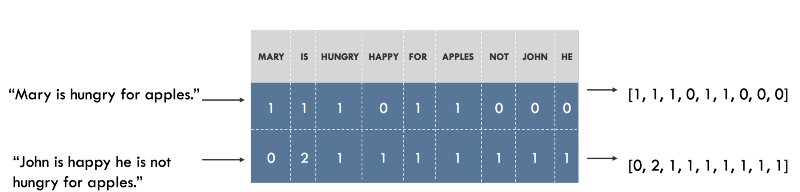 \
По своей сути таблица всех слов, где для каждого конкретного блока текста расставляются значения - количество раз, которое встречалось слово в данном блоке.

Считаем частоту встречающихся слов во всех сообщениях. Создаём словари по частоте слов ввиде для кодирования. Кодируем каждый токен своим числом и получаем вектора.

In [24]:
words_lem = Counter()
for message in clean_tokens_lem:
    words_lem.update(message)

words_stem = Counter()
for message in clean_tokens_stem:
    words_stem.update(message)

In [25]:
# Словари, отображающий слова в коды и обратно
word_to_index_lem = dict()
index_to_word_lem = dict()

for i, word in enumerate(words_lem):
    word_to_index_lem[word] = i + 1
    index_to_word_lem[i + 1] = word

In [26]:
# Словари, отображающий слова в коды и обратно
word_to_index_stem = dict()
index_to_word_stem = dict()

for i, word in enumerate(words_stem):
    word_to_index_stem[word] = i + 1
    index_to_word_stem[i + 1] = word

In [27]:
def text_to_sequence(txt, word_to_index):
    seq = []
    for word in txt:
        index = word_to_index.get(word, 1) # 1 означает неизвестное слово
        # Неизвестные слова не добавляются
        if index != 1:
            seq.append(index)
    return seq

In [28]:
seq_lem = clean_tokens_lem.apply(lambda row: text_to_sequence(row, word_to_index_lem))
seq_stem = clean_tokens_stem.apply(lambda row: text_to_sequence(row, word_to_index_stem))

Далее создадим сами вектора для блоков текста.

In [29]:
def vectorize_sequences(sequences, dimension=9000):
    results = np.zeros((len(sequences), dimension), dtype='int8')
    print
    for i, sequence in enumerate(sequences):
        for index in sequence:
            results[i, index] += 1.
    return results

In [30]:
X_lem = vectorize_sequences(seq_lem, len(index_to_word_lem) + 1)
X_stem = vectorize_sequences(seq_stem, len(index_to_word_stem) + 1)

In [24]:
# Мешок слов с лемматизацией
X_train, X_test, y_train, y_test = train_test_split(X_lem, y_lem, test_size=0.2, stratify=y_lem)

knn1 = KNeighborsClassifier().fit(X_train, y_train)

In [25]:
result1 = accuracy_score(y_test.astype('int8'), knn1.predict(X_test))
print(result1)

0.6572226099092813


In [26]:
#Мешока слов со стеммингом
X_train, X_test, y_train, y_test = train_test_split(X_stem, y_stem, test_size=0.2, stratify=y_stem)

knn2 = KNeighborsClassifier().fit(X_train, y_train)

In [27]:
result2 = accuracy_score(y_test.astype('int8'), knn2.predict(X_test))
print(result2)

0.6481791544579322


<div align="justify">В данном случае мы видим, что такой подход показал себя достаточно неплохо в обоих случаях(стемминг и лемматизация). Несмотря на то, что скор обеих моделей 0. 65 - это достаточно неплохо, т. к. была использована "сырая" модель без подбора гиперпараметров(построение модели не входило в задачи). Она приведена для сравнения методов. Дальше будем использовать данные с лемматизацией, т. к. скор всё-таки чуть лучше.</div>

**Облако слов**

<div align="justify">Теперь рассмотрим метод визуализации. Построим график "Облако слов", который показывает важность слов в тексте. Чем больше размер слова, тем чаще оно встречается. Такие графики можно строить как по частоте, так и по важности слов для конкретного метода. Например, для тех, которые будут рассмотрены дальше.</div>

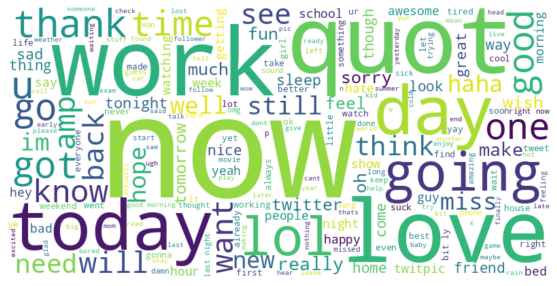

In [30]:
text = ' '.join(X)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Методы **плотного векторного преставления** слов.

<b>Tf-idf - term frequency inverse invers document frequency.</b>
> <div align="justify">Метод $\mathtt{tf-idf}$ векторизации заключается в трансформации слов в вектора не только на основе частоты повторения в тексте, но и важности слова, его влияния. Такой подход решает проблему баланса между часто встречающимися словам, несущими меньше полезной информации, и словами, которые встречаются черезвычайно редко, но являющиеся более важными. Иными словами устраняет шумы. Рассчёт векторов осуществляется ввиде $\mathtt{tf-idf(t, d) = tf(t,d) * idf (t)}$, где $\mathtt{tf(t, d)}$ - это просто частота появления слова в документе, а $\mathtt{idf(t, f)}$ измеряет уникальность слова и расчитывается по формуле $ \mathtt{idf(t) = \frac{log(1 + n)}{1 + df(d, t)} + 1}$ В связи с этим часто встречающиеся слова имеют низкий $\mathtt{idf}$ так как несут мало информации в себе. Полученные векторы нормализуются с помощью евклидовой нормы.
</div>

In [35]:
vectorizer = TfidfVectorizer(max_features=25)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(clean_tokens_lem, y_lem, test_size=0.2, random_state=5)

X_train_tfidf = vectorizer.fit_transform(X_train.apply(' '.join))
X_test_tfidf = vectorizer.transform(X_test.apply(' '.join))

knn3 = KNeighborsClassifier().fit(X_train_tfidf, y_train)

In [16]:
accuracy_score(y_test, knn3.predict(X_test_tfidf))

0.5549197487787858

<div align="justify">Вероятнее всего, tf-idf векторизация показала результат хуже, чем предыдущий метод, из-за того, что в данных достаточно мало уникальных слов. А токены которые действительно являются индикаторами встречались достаточно часто, что привело к тому, что метод снизил их значимость.</div>

<div align="justify">В отдельных случаях может понадобиться визуализировать конкретный экземпляр датасета, чтобы понять, на основе чего было сделано предсказании, и тем самым проанализировать корректность работы модели. Для таких случаев существует библиотека Lime. </div>

In [37]:
pipeline = make_pipeline(vectorizer, knn3)
sample_data = ' '.join(X_test[911457])

explainer = lime.lime_text.LimeTextExplainer(class_names=['positive', 'negative'])

exp = explainer.explain_instance(sample_data, pipeline.predict_proba, num_features=4, top_labels=1)
exp.show_in_notebook(text=False)

<b>Word2vec</b>
 ><div align="justify">Алгоритм получения векторного представления слов на основе нейросетей. Алгоритм состоит из 3 частей: получение bag of words, генерация embbeding и выходной слой ввиде функции Softmax. Этот подход позволяет выделять семмантическое расстояние - качественная оценка сходства слов. Существует два вида архитектуры $\mathtt{CBoW}$ и $\mathtt{skip-gram}$. $\mathtt{CBoW}$ предсказывает токен на основе окружающих его токенов, а $\mathtt{skip-gram}$ работает в обратном порядке, предсказывает для конкретного слова окружающие его токены. Схожесть слов - векторов определяется с помощью косинусного расстояния: $\mathtt{similarity(A, B) = cos( \theta ) = \frac{A \cdot B}{||A|| \cdot ||B||} = \frac{\sum_{i=1}^n A_i \cdot B_i}{\sqrt{\sum_{i=1}^n{A^{2}_i}} \cdot \sqrt{\sum_{i=1}^n{B^{2}_i}}}} $. Сам Word2vec также представляет готовые для использования обученные модели.
    </div>

**Skip-gram**
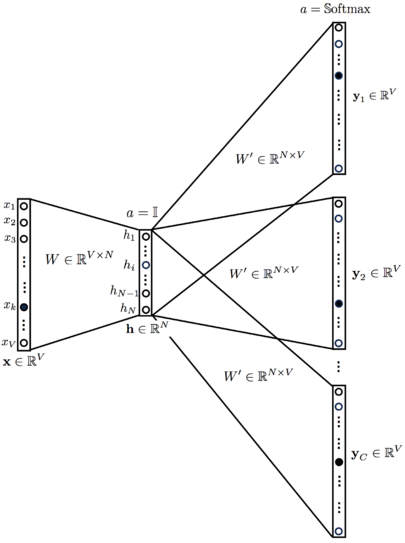
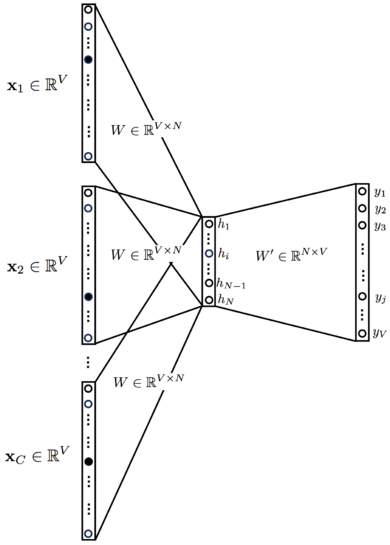
**CBoW**

<div align="justify">Небольшой комментарий по поводу работы этих двух алгоритмов. Слои этих моделей одинаковые по назначению. Первый слой это One-hot encoding таблица. Второй это слой эмбедингов, а третий слой с оценкой в виде SoftMax функции. Различие только в том, что модель <b>Skip-gram</b> на первом слое получает только одно слово и навыходе возвращает соседние с этим слова(вероятности соседних слов). <b>CBoW</b> получает же несколько соседних слов, а на выходе слово предсказание слова, которое находится между ними(вероятности слов).</div>

In [104]:
w2v = Word2Vec(clean_tokens_lem, vector_size=100, window=5, min_count=1, workers=32)

<div align="justify">Попробуем визуализировать результат, но как? w2v создаёт многомерное пространство, сейчас тяжело визуализировать четырёхмерные пространства, но что если размерность векторов даже не 4, а 10, 15 и т.д. В такой ситуации помогает <b>t-SNE</b>. <b>t-SNE</b> преобразует сходство между точками пытаясь минимизировать расхождение Кульбака-Лейблера между совместными вероятностями, уменьшая размерность векторного пространства. Метод достаточно спорный так как функция стимости, которая используется при сжатии выпуклая, в связи с этим при каждой инициализации возможно получение разных результатов.</div>

Обучим модель Word2Vec и и выберем вектора 50 слов близких к меткам классов.

In [105]:
classes = ['positive', 'negative']
w2v.build_vocab([[word] for word in classes], update=True)
w2v.train(classes, total_examples=w2v.corpus_count, epochs=w2v.epochs)

embedding_clusters = []
word_clusters = []

for word in classes:
    embeddings = []
    words = []
    for similar_word, _ in w2v.wv.most_similar(word, topn=45):
        words.append(similar_word)
        embeddings.append(w2v.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

Сжимаем пространство до двумерного с помощью TSNE, чтобы не потерять расположение векторов относительно друг друга.

In [106]:
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=1)
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

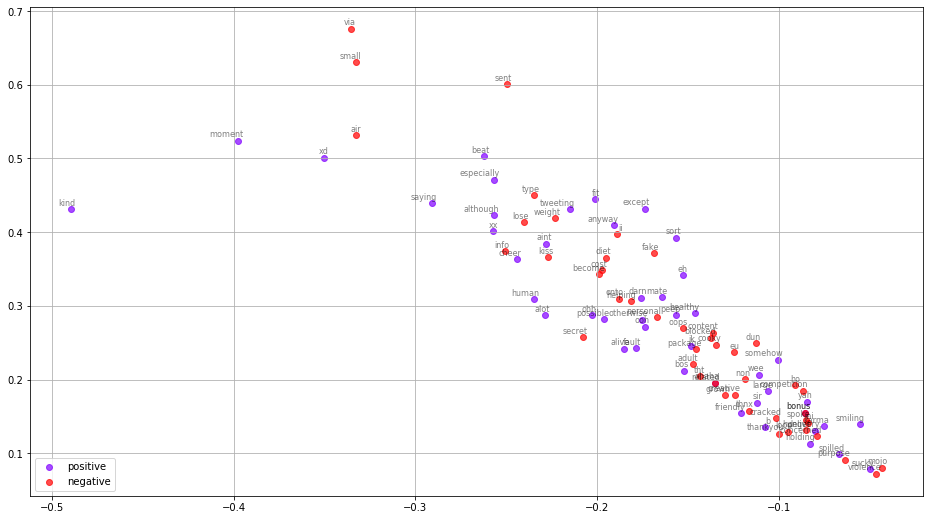

In [107]:
plt.figure(figsize=(16, 9))
colors = cm.rainbow(np.linspace(0, 1, len([i for i in classes])))
for clas, embeddings_en_2d, words, color in zip([i for i in classes], embedding_clusters, word_clusters, colors):
    x = embeddings_en_2d[:,0]
    y = embeddings_en_2d[:,1]
    plt.scatter(x, y, c=color, alpha=0.7, label=clas)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom', size=8)
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

Теперь опробуем данный подход на практике.

In [53]:
w2v = Word2Vec(clean_tokens_lem, vector_size=100, window=5, min_count=1, workers=32)

In [43]:
def w2v_vectorize(sentence):
    vectorized_sentence = []
    for word in sentence:
        vectorized_sentence.append(w2v.wv[word])
    return np.mean(vectorized_sentence, axis=0)

При работе с word2vec после получения эмбеддингов, переходят к усреднению оценок, добавлению вектора или обрезке. Используем усреднение.

In [44]:
X_embeddings = clean_tokens_lem.apply(w2v_vectorize)
X_embeddings

1310619    [-0.14211427, 0.22642805, 0.025588444, 0.06141...
942718     [-0.24489169, 0.48058632, 0.121952824, -0.1087...
198336     [0.0040751793, 0.5660518, -0.097652115, 0.0330...
1032112    [-0.22661278, 0.5604471, 0.11264627, -0.251738...
1267663    [-0.32949775, 0.6637872, 0.083613545, -0.14985...
                                 ...                        
1572515    [-0.10308477, 0.15748627, -0.0034467457, 0.004...
1073093    [-0.079716004, 0.6211808, 0.1957034, -0.075381...
1570510    [-0.16868131, 0.50746495, 0.034572016, 0.00078...
1360024    [0.09424777, 0.36652142, 0.0011068508, -0.1177...
973963     [-0.050988983, 0.422589, 0.0812434, -0.0767486...
Name: content, Length: 71646, dtype: object

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_embeddings.apply(pd.Series), y_lem, test_size=0.2, stratify=y_lem)

knn5 = KNeighborsClassifier().fit(X_train, y_train)
print(accuracy_score(y_test, knn5.predict(X_test)))

0.6378925331472436


В данном случае мы видим достаточно хороший результат. Учитывая то, что эмбеддинги были просто усредненны. Усреденние - это достаточно спорный подход, но он существует и применяется.

<b>Fasttext</b> 
><div align="justify">Библиотека, разработанная компанией Facebook, схожа с библиотекой Word2Vec. Это тоже семантические модели для обработки текста. Одним из недостатков Word2Vec является то, что слова, которых не было в тренировочной выборке, не могут быть использованы в тестовой. Fasttext предлагает решение этой проблемы с помощью N-грамм. Модель складывает вектора всех N-рамм для слова и используют полученный вектор.
</div>

В примере с Word2Vec модель была обучена на корпусе слов из датасета. Сейчас загрузим уже обученную модель. Будем использовать готовые эмбеддинги для наших слов.

In [ ]:
fasttext.util.download_model('en', if_exists='ignore')

In [ ]:
ft = fasttext.load_model('/kaggle/working/cc.en.300.bin')

In [43]:
placeholder_vector = np.random.rand(300)

In [44]:
def ff_vectorize(sentence, max_len, phv):
    vectorized_sentence = []
    for word in sentence:
        vectorized_sentence.append(ft.get_word_vector(word))
    vectorized_sentence.extend([list(phv)] * (max_len - len(sentence)))
    return vectorized_sentence

Ещё одним методом уравнивания количества векторов после получения эмбеддингов служит вектор заполнитель. Случайно сгенерированный вектор, который добавляется в каждый массив, пока вектора корпусов текстов не станут одной размерности.

In [128]:
import ast
data = pd.read_csv('/kaggle/input/spdfsdpokfops/prepr.csv', index_col=0)
data['content'] = data['content'].apply(ast.literal_eval)
clean_tokens_lem = data.content
y_lem = data.sentiment

In [129]:
X_embeddings = clean_tokens_lem.apply(ff_vectorize, args=(max(clean_tokens_lem.apply(len)), placeholder_vector))

In [130]:
X_ff = np.array(X_embeddings.to_list()).reshape(len(X_embeddings), 300 * max(clean_tokens_lem.apply(len)))

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X_ff, y_lem, test_size=0.2)

knn6 = KNeighborsClassifier().fit(X_train, y_train)
print(accuracy_score(y_test, knn6.predict(X_test)))

0.5985345429169574


<div align="justify">С данной моделью получили результат чуть хуже, чем с Word2Vec. Одним из объяснений может быть то, что была использована готовая модель и не все слова были определены однозначно. То есть вектора были вычислены приблизительно с помощью N-gram.</div>

### Вывод

<div align="justify">В предварительной обработке любых данных существует множество способов. Стоит понимать, что нет панацеи для подготовки признаков для модели. Обработка текстов - не исключение. Хотя и присутствуют основные способы подготовки текстовой информации в виде нормализации текста. Но они лишь помогут улучшить качество данных для преобразования в численный вид. Сначала стоит оценить задачу и, исходя из неё, формировать список методов обработки данных. Подводя итог, предварительная обработка данных - это один из основных этапов моделирования, за счёт которого улучшается качество и точность моделей.</div>